In [44]:
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
train_trans=pd.read_csv("Train_trans.csv")

In [46]:
pd.set_option('display.max_columns', None)
train_trans.describe()

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,use_time,fail_7
count,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.00000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000
mean,16.274839,16.521473,16.277490,16.355560,-0.043389,-0.053018,25.800928,26.353566,25.903624,26.081865,-0.094954,-0.114908,0.590593,16.343948,26.082150,16.335808,26.060941,16.344470,26.081787,16.388272,26.127173,16.316412,26.064004,16.373961,26.116722,16.579331,26.561563,16.546822,26.510883,16.415961,26.238740,16.51461,26.382522,-0.108077,-0.100143,-0.089710,-0.118150,-0.039316,-0.038808,-0.047337,84.978399,84.859009,25.258990,2.154864,351.421779,348.207773,16.352522,26.081939,4159.266095,20.526154,42.434462,549.999383,0.232123
std,15.374342,15.425769,15.305041,15.127922,0.776305,0.756452,29.243961,29.459305,29.269789,28.979008,1.270488,1.324785,0.491731,15.208344,29.158269,15.196279,29.138853,15.142292,29.048877,15.114650,28.896692,14.902038,28.612361,14.824743,28.402516,14.756009,28.364380,14.512375,27.859306,14.161609,27.130185,13.82671,26.413544,1.385724,1.373807,1.322031,1.375298,0.720808,0.787685,0.818200,15.466961,15.507518,37.037053,2.223237,12.745409,13.277782,3.553653,6.813312,11.306765,16.461988,10.321011,22.159084,0.422193
min,1.510000,1.060000,0.040000,1.070000,-76.946667,-42.130000,0.520000,0.700000,1.070000,1.740000,-22.413333,-18.606667,0.000000,2.960000,2.110000,0.860000,1.960000,1.420000,2.430000,1.420000,0.850000,2.790000,0.040000,2.410000,2.140000,2.050000,1.850000,2.880000,0.020000,2.240000,0.080000,1.76000,0.370000,-58.820000,-61.173333,-29.996667,-47.583333,-17.450000,-56.886667,-85.763333,14.666667,14.416667,0.000000,0.090909,304.050833,298.250000,4.890000,4.131111,4112.454545,1.000000,9.021111,405.000000,0.000000
25%,4.910000,4.920000,4.900000,4.900000,-0.066667,-0.100000,4.200000,4.210000,4.200000,4.200000,-0.183333,-0.233333,0.000000,4.910000,4.210000,4.910000,4.200000,4.900000,4.210000,4.900000,4.200000,4.900000,4.200000,4.900000,4.210000,4.920000,4.230000,4.940000,4.250000,4.960000,4.270000,4.98000,4.340000,-0.190000,-0.206667,-0.203333,-0.240000,-0.086667,-0.086667,-0.090000,74.647059,74.500000,3.565217,1.052632,342.770532,339.267541,13.912625,21.418250,4151.666667,11.333333,35.364068,537.000000,0.000000
50%,5.770000,5.830000,5.780000,5.790000,0.000000,-0.003333,5.860000,5.92

In [47]:
train_trans.shape

(40500, 53)

<h2>Test a few models</h2>

1. logistic
2. neural network
3. ensembling trees
4. knn
5. naive bayes
6. svm

In [48]:
X_train=train_trans.drop(["fail_7"],axis=1)
Y_train=train_trans["fail_7"]

In [51]:
# Load libraries

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier




# Spot Check Algorithms
models = []


# Gaussian Naive Bayes
#models.append(('NB', GaussianNB())) 


# Logistic regression
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

#KNN
#models.append(('KNN',KNeighborsClassifier()))

#Kernalize SVM
models.append(('SVM',SVC()))

#GBDT
models.append(('GBDT', GradientBoostingClassifier(random_state=0)))


In [52]:
#pip install joblib
from joblib import parallel_backend

In [53]:
# evaluate each model in turn
#split into 5 for cross validation 

#For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.
results = []
names = []
with parallel_backend('threading', n_jobs=-1):
    for name,model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=0,shuffle=True)
        cv_results = cross_val_score(model, 
                                     X_train,
                                     Y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name,cv_results.mean(),cv_results.std()))

LR: 0.768198 (0.001072)
SVM: 0.767877 (0.000049)
GBDT: 0.813630 (0.004020)


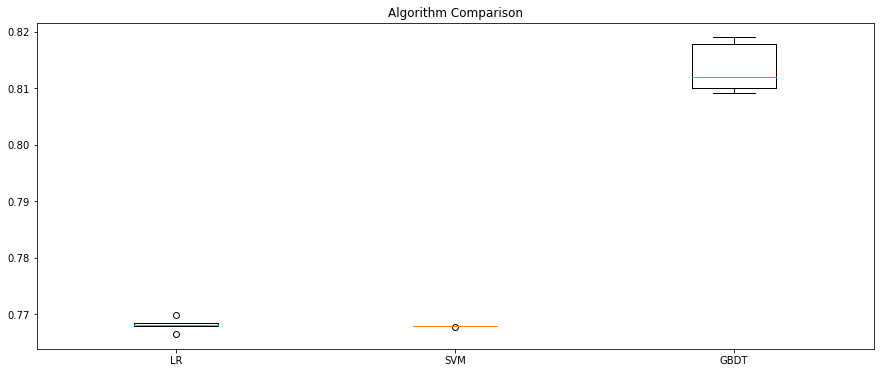

In [54]:
# Compare Algorithms
fig,ax = plt.subplots(figsize=(15,6))
ax.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show() 
#USE GBDT AS EVALUATION METHOD FOR NOW

<h2>Create methods to evaluate new features adding</h2>

1. cv score(USE THIS, GBDT CV SCORE for now)
2. aic, bic
3. feature importance rank

<h2>Quick Model Evaluation</h2>

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=0)


with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(rf,X_train,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

score_record

p=train_trans.shape[1]
p

from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(random_state=0,hidden_layer_sizes=[1])


with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(mlp,X_train,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

score_record
#MLP only need 1 layer and of size 1 node to get 0.767, which is basically like logistic regression

<h2>Graph time series</h2>

In [55]:
import re

In [56]:
def plot_by_group(pattern):
    match=[]
    names=[]
    for item in train_trans.columns:
        result = re.match(pattern, item)
        match.append(bool(result))
        if bool(result):
            names.append(item)
    group=train_trans[names]
    group.mean().plot(kind="line")
    plt.show()

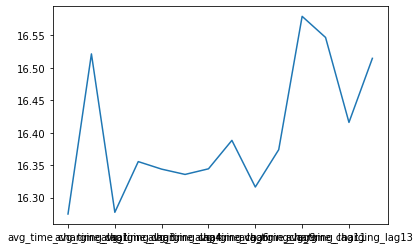

In [57]:
plot_by_group("^avg_time_charging_lag")

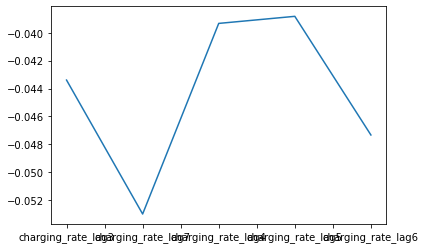

In [58]:
plot_by_group("^charging_rate_lag")

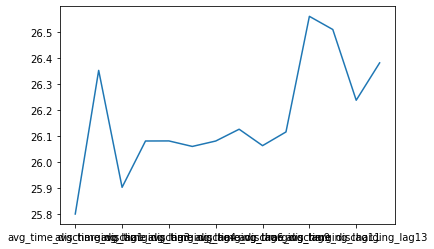

In [59]:
plot_by_group("^avg_time_discharging_lag")

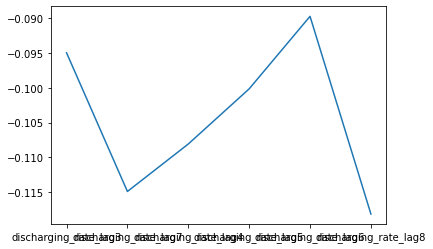

In [60]:
plot_by_group("^discharging_rate_lag")

In [86]:
import seaborn as sns

In [87]:
df_plot = df_eng[['avg_charging_rate', 'avg_discharging_rate', 'avg_time_charging', 'avg_time_charging_14',
                  'avg_time_discharging', 'avg_time_discharging_14', 'avg_volt_change_charging',
                  'avg_volt_change_discharging', 'charge_cycle_time_below_12', 'chargecycles', 'cycle_time', 
                  'dischargecycles', 'fail_7', 'max_voltage_day', 'number_times_restart', 'piececount', 
                  'total_off_time','use_time']]

Text(0.5, 1.0, 'Correlation Matrix Pearson Method')

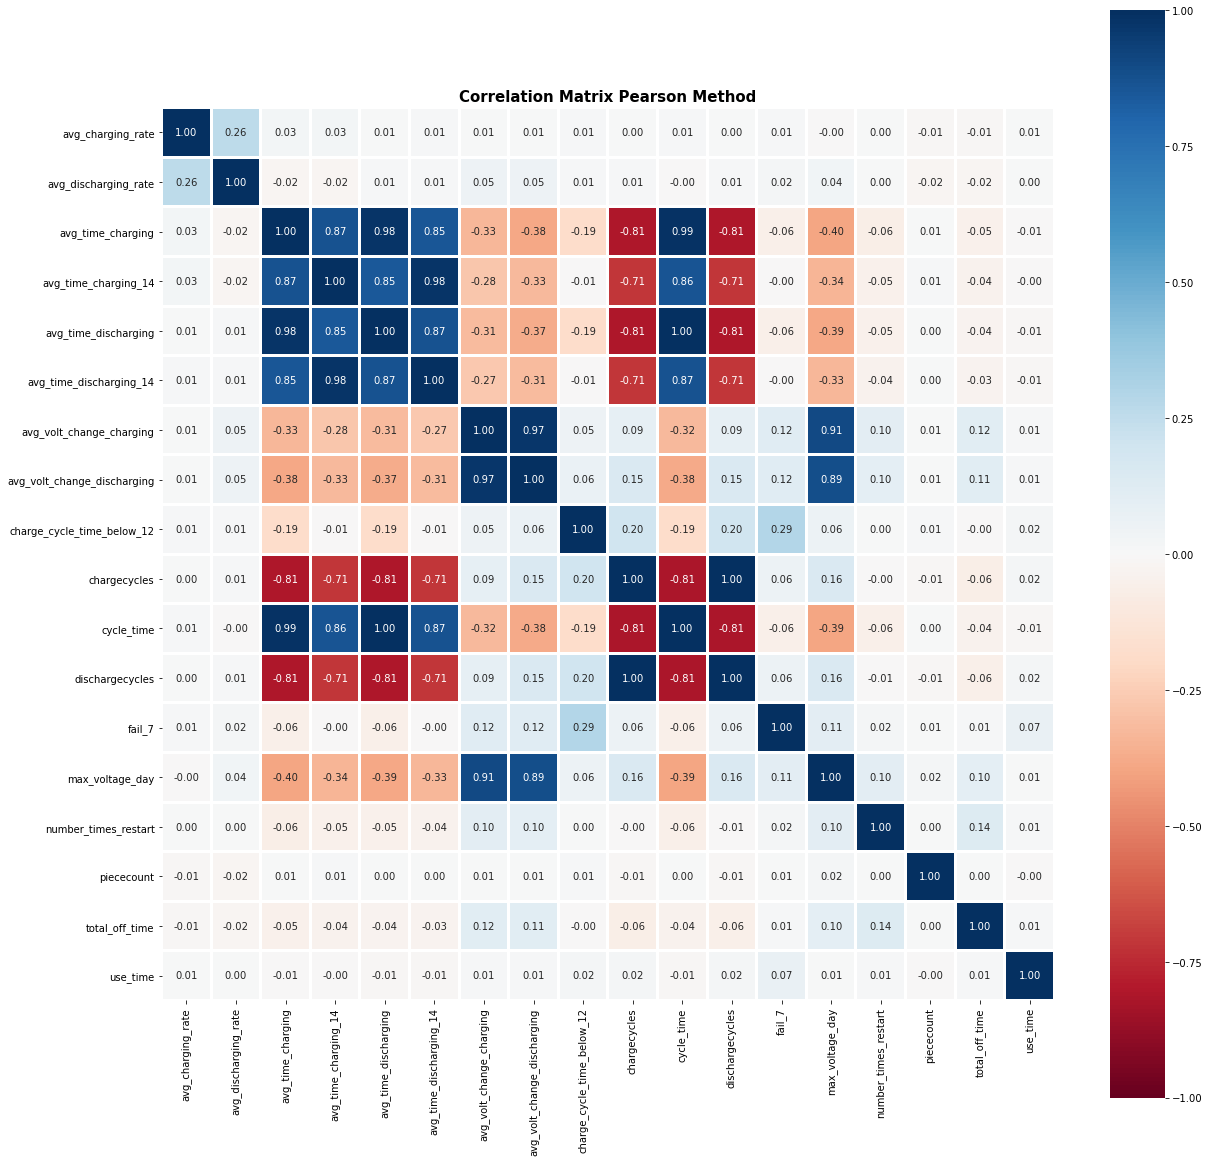

In [88]:
# Pearson Correlation Heatmap
plt.figure(figsize = (20, 20))
sns.heatmap(df_plot.corr(method = 'pearson'), annot = True, fmt = ".2f", cmap = 'RdBu', vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = 2)
plt.title("Correlation Matrix Pearson Method", size = 15, weight = 'bold')

<h2>Relationship between these?</h2>

In [101]:
df_eng[['cycle_time','charge_cycle_time_below_12','chargecycles','dischargecycles',
        'avg_time_charging','avg_time_discharging']].head(10)
#1=5+6

,cycle_time,charge_cycle_time_below_12,chargecycles,dischargecycles,avg_time_charging,avg_time_discharging
0,60.701250,0.0,50.250000,49.750000,21.696250,39.005000
1,52.097143,0.0,56.285714,56.000000,19.883571,32.213571
2,34.146667,0.0,80.380952,80.333333,13.675238,20.471429
3,42.496316,0.0,91.736842,91.684211,16.306842,26.189474
4,49.609333,1.0,71.066667,70.733333,18.797333,30.812000
5,32.499500,0.0,100.900000,100.550000,12.878500,19.621000
6,44.880000,0.0,72.130435,71.869565,17.384783,27.495217
7,54.502857,0.0,50.571429,50.428571,19.920000,34.582857
8,48.905714,0.0,78.714286,78.571429,18.780714,30.125000
9,43.427619,1.0,89.333333,89.142857,16.782381,26.645238


<h2>detect outliers</h2>

In [119]:
from sklearn.ensemble import IsolationForest

In [121]:
iso=IsolationForest(random_state=0)
iso.fit(train_trans)

IsolationForest(random_state=0)

In [122]:
pred=iso.predict(train_trans)

In [124]:
df_outlier=train_trans
df_outlier['outliers']=pred

In [126]:
outliers=df_outlier.loc[df_outlier['outliers']==-1]


In [128]:
outliers.shape

(2435, 63)

In [132]:
outliers.head(5)

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,use_time,fail_7,avg_time_charging_14,avg_time_discharging_14,avg_charging_rate,avg_discharging_rate,use_time_square,charging_power,discharging_capacity,discharge_cycles_squared,charge_cycles_squared,outliers
16,40.50,4.98,51.18,47.73,-0.053333,-0.360000,77.55,4.47,91.32,87.36,0.023333,0.706667,1.0,27.99,44.24,5.64,4.82,40.68,73.21,4.53,4.26,4.76,4.54,46.64,73.17,4.89,3.57,27.808,45.298,19.496,33.098,11.944,17.672,0.243333,-0.006667,-0.623333,0.136667,2.213333,0.036667,0.530000,83.333333,82.916667,0.000000,1.250000,312.263333,300.710833,23.738333,39.410833,4127.583333,3.444444,63.149167,583,0,24.197714,40.327000,0.473333,0.080000,339889,11.236144,3.152867,6875.173612,6944.444444,-1
39,12.85,4.76,48.37,39.19,-0.026667,0.583333,17.13,3.57,100.70,77.31,0.040000,-0.566667,1.0,27.52,43.02,4.97,3.38,33.80,61.08,43.91,73.81,33.82,59.29,46.01,77.24,29.87,59.79,26.922,43.612,21.242,35.118,5.480,5.590,-0.566667,-0.010000,2.056667,0.006667,0.330000,0.023333,-3.520000,50.166667,49.916667,0.166667,1.166667,340.527500,335.433333,27.498333,48.535000,4146.416667,80.500000,76.033333,533,0,27.051000,47.188571,-0.522000,0.160000,284089,-14.354130,7.765600,2491.673611,2516.694445,-1
82,13.71,5.42,30.03,7.91,0.086667,-1.010000,22.97,5.33,57.33,21.98,0.086667,-1.206667,1.0,20.85,33.12,46.60,75.09,57.45,91.76,5.59,4.48,37.01,72.89,12.07,18.23,34.09,74.36,4.950,3.590,43.180,76.170,24.350,38.180,-1.210000,0.016667,0.063333,-1.970000,-0.320000,0.026667,-1.160000,51.000000,50.666667,25.166667,1.500000,349.493333,341.984444,22.840000,38.565000,4161.333333,18.777778,61.405000,574,1,24.515000,42.534286,-0.475333,-0.703333,329476,-10.856613,-27.124050,2567.111111,2601.000000,-1
86,50.74,31.37,33.15,5.27,-0.396667,-0.036667,91.47,47.49,60.11,6.14,-2.093333,1.106667,0.0,33.13,71.81,43.43,74.64,33.75,62.47,42.67,74.78,4.91,3.35,29.22,42.01,20.38,27.71,32.430,52.460,6.490,6.000,18.818,28.458,-0.476667,-0.740000,-0.010000,-1.550000,0.476667,-0.210000,-0.353333,37.500000,36.928571,87.285714,1.142857,333.385714,320.672143,28.635000,47.907143,4146.928571,11.000000,76.542143,555,0,27.554143,46.349857,-0.104000,-0.627222,308025,-2.978040,-30.048425,1363.719388,1406.250000,-1
103,5.09,25.11,41.20,4.85,-0.873333,0.036667,5.53,44.42,86.98,3.35,1.770000,-0.013333,0.0,4.80,4.26,55.04,94.20,4.62,4.21,48.18,82.19,5.33,6.73,5.25,4.32,28.59,58.60,42.880,70.490,20.930,40.150,38.110,63.600,0.286667,0.743333,3.363333,-1.740000,-0.136667,0.416667,-3.076667,62.750000,62.625000,0.937500,1.125000,335.013125,331.198750,25.841250,46.280625,4140.062500,23.714286,72.121875,550,1,23.570000,40.645000,-0.726667,0.735000,302500,-18.777975,34.016259,3921.890625,3937.562500,-1


<h2>remove them all and see performance</h2>

In [146]:

df_nonOuts=df_outlier[df_outlier['outliers']!=-1]
df_nonOuts.head(5)

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,use_time,fail_7,avg_time_charging_14,avg_time_discharging_14,avg_charging_rate,avg_discharging_rate,use_time_square,charging_power,discharging_capacity,discharge_cycles_squared,charge_cycles_squared,outliers
0,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,-1.163333,0.033333,0.0,4.99,5.85,24.35,31.02,43.42,79.33,18.386,26.956,4.848,5.346,18.502,31.068,19.514,30.98,19.78,33.84,28.17,48.478,24.358,41.122,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,543,0,20.321286,34.634286,-0.352000,0.121111,294849,-7.637080,4.723939,2475.062500,2525.062500,1
1,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,-0.066667,-2.653333,0.0,13.64,20.37,5.65,4.77,19.41,24.33,35.920,59.380,4.490,4.120,44.180,72.460,27.450,49.02,10.89,18.93,21.39,35.900,17.496,28.052,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,522,0,18.247571,28.638714,-0.390667,-1.671667,272484,-7.767849,-53.850354,3136.000000,3168.081633,1
2,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,-2.643333,0.686667,0.0,25.01,40.69,6.03,6.06,5.72,5.73,22.460,31.820,33.920,58.870,45.870,76.360,5.780,6.23,5.13,4.37,4.73,3.500,26.790,41.290,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,518,0,14.462143,21.704286,-0.116667,-0.258333,268324,-1.595444,-5.288452,6453.444444,6461.097506,1
3,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,-0.166667,0.033333,0.0,4.71,3.74,4.74,3.73,24.01,52.99,5.090,5.320,4.450,4.220,22.140,30.510,4.390,4.15,4.71,3.82,13.27,18.620,4.970,4.160,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,548,0,15.245714,24.710714,0.368000,-0.008889,300304,6.000918,-0.232795,8405.994461,8415.648200,1
4,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,0.066667,-1.030000,1.0,40.36,82.70,15.47,24.21,45.64,76.42,26.630,45.040,27.990,40.570,5.010,6.520,5.470,4.64,5.28,5.16,25.10,47.760,21.620,37.290,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,566,0,19.771429,32.609286,0.304667,-0.355000,320356,5.726921,-10.938260,5003.204444,5050.471112,1


In [147]:
X_train_nonOuts=df_nonOuts.drop('fail_7',axis=1)
Y_train_nonOuts=df_nonOuts['fail_7']



gbdt=GradientBoostingClassifier(random_state=0)


with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(gbdt,X_train_nonOuts,Y_train_nonOuts,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [148]:
score_record
#after cleaning out all outliers, improved to 0.8164 from 0.8136, by 0.0028, by predicting 11 more correctly

0.8163667411007486

In [149]:
1/4000
#require at least 0.00025 improve in accuracy

0.00025

<h2>Use only core features to test</h2>

In [150]:
core_features=['discharging_rate_lag3','charge_cycle_time_below_12','charging_rate_lag3','avg_volt_change_charging']

X_train_nonOuts_core=X_train_nonOuts[core_features]

gbdt=GradientBoostingClassifier(random_state=0)


with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(gbdt,X_train_nonOuts_core,Y_train_nonOuts,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [162]:
X_train_nonOuts_core.head(5)

,discharging_rate_lag3,charge_cycle_time_below_12,charging_rate_lag3,avg_volt_change_charging
0,-1.163333,0.0,0.086667,377.080000
1,-0.066667,0.0,0.136667,350.517857
2,-2.643333,0.0,-0.460000,346.113333
3,-0.166667,0.0,0.076667,356.184211
4,0.066667,1.0,0.040000,370.904000


In [151]:
score_record
#only these 4 contains useful info, has even higher score than w/o it!

0.8166031787731513

<h2>A bit of model tuning to see how high we can get now</h2>

In [158]:
param_grid_gb = {'n_estimators':[50,100,200,500]}
print("Parameter grid:\n{}".format(param_grid_gb))

Parameter grid:
{'n_estimators': [50, 100, 200, 500]}


In [159]:
from sklearn.model_selection import GridSearchCV
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid_gb, cv=5)

In [160]:
with parallel_backend('threading', n_jobs=-1):
    grids_object=grid_search_gb.fit(X_train_nonOuts_core, Y_train_nonOuts)

In [161]:
print("Best parameters: {}".format(grids_object.best_params_))
print("Best cross-validation score: {:.2f}".format(grids_object.best_score_))
# turns out the default parameters are the best

Best parameters: {'n_estimators': 100}
Best cross-validation score: 0.82


<h1>IMPORTANT!!!</h1>

<h2>Use outliers-cleaned, only top 4 features, default GBDT models->0.82</h2>
<h2>We need to: 1. redecide should we keep engineering new "infoless" features?</h2>
<h2>2. should we skip feature engineering part and go to model building and testing?</h2>